In [1]:
import pandas as pd
import json
import numpy as np
import sys 
import os
import matplotlib.pyplot as plt

# Compare

In [2]:
files = os.listdir("json_files/")
files = [file  for file in files if "COMPARISON" in file ]

In [3]:
files

['10_COMPARISON.json',
 '10_COMPARISON_1.json',
 '10_COMPARISON_2.json',
 '13_COMPARISON.json',
 '13_COMPARISON_1.json',
 '13_COMPARISON_2.json',
 '16_COMPARISON.json',
 '16_COMPARISON_1.json',
 '16_COMPARISON_2.json',
 '17_COMPARISON.json',
 '17_COMPARISON_1.json',
 '17_COMPARISON_2.json',
 '18_COMPARISON.json',
 '18_COMPARISON_1.json',
 '18_COMPARISON_2.json',
 '1_COMPARISON.json',
 '1_COMPARISON_1.json',
 '1_COMPARISON_2.json',
 '21_COMPARISON.json',
 '21_COMPARISON_1.json',
 '21_COMPARISON_2.json',
 '22_COMPARISON.json',
 '22_COMPARISON_1.json',
 '22_COMPARISON_2.json',
 '23_COMPARISON.json',
 '23_COMPARISON_1.json',
 '23_COMPARISON_2.json',
 '24_COMPARISON_1.json',
 '24_COMPARISON_2.json',
 '25_COMPARISON.json',
 '25_COMPARISON_1.json',
 '26_COMPARISON_3.json',
 '27_COMPARISON_3.json',
 '28_COMPARISON_3.json',
 '29_COMPARISON_3.json',
 '29_COMPARISON_4.json',
 '2_COMPARISON.json',
 '2_COMPARISON_1.json',
 '2_COMPARISON_2.json',
 '30_COMPARISON_3.json',
 '31_COMPARISON_4.json',
 '3

In [4]:
df = pd.DataFrame()

for file in files:
    with open("../Results/json_files/"+file) as json_file:
        json_data = json.load(json_file)
        df = pd.concat([df, pd.DataFrame(json_data)])

In [5]:
df

,Experiment_id,Model,Dataset,Learning rate,Noise level,Task size,Evaluation loss,Vrae weight,Training,ML-Horizon,Meta-learning rate,Trial,Adaptation steps,Horizon,Value,Val error,Final_epoch
0,10_COMPARISON,LSTM,HR,0.01,0.01,50,MAE Test,-,MAML,1,0.0005,0,5,10,0.065904,0.059001,2161
1,10_COMPARISON,LSTM,HR,0.01,0.01,50,MAE Test,-,MAML,1,0.0005,0,0,10,0.066002,0.090225,2161
2,10_COMPARISON,LSTM,HR,0.01,0.01,50,MAE Test,-,MAML,1,0.0005,0,5,1,0.049037,NaN,2161
3,10_COMPARISON,LSTM,HR,0.01,0.01,50,MAE Test,-,MAML,1,0.0005,0,0,1,0.064593,NaN,2161
4,10_COMPARISON,LSTM,HR,0.01,0.01,50,MAE Test,-,MAML,1,0.0005,1,5,10,0.068092,0.060019,1370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,9_COMPARISON_2,LSTM,HR,0.01,0.01,50,MAE Test,-,MAML,1,0.0005,1,0,1,0.073234,NaN,1624
8,9_COMPARISON_2,LSTM,HR,0.01,0.01,50,MAE Test,-,MAML,1,0.0005,2,1,10,0.078747,0.065613,1017
9,9_COMPARISON_2,LSTM,HR,0.01,0.01,50,MAE Test,-,MAML,1,0.0005,2,0,10,0.068681,0.092993,1017
10,9_COMPARISON_2,LSTM,HR,0.01,0.01,50,MAE Test,-,MAML,1,0.0005,2,1,1,0.062278,NaN,1017


In [6]:
df.groupby(["Experiment_id", "Dataset", "Training","Adaptation steps", "Horizon", "Vrae weight"])["Value", "Val error"].agg(["mean", "std"])

C:\Users\Sebastian\Anaconda3\envs\pytorch12\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Value  \
                                                                           mean   
Experiment_id   Dataset Training Adaptation steps Horizon Vrae weight             
10_COMPARISON   HR      MAML     0                1       -            0.066833   
                                                  10      -            0.068432   
                                 5                1       -            0.050333   
                                                  10      -            0.067162   
10_COMPARISON_1 HR      MAML     0                1       -            0.072844   
...                                                                         ...   
9_COMPARISON_1  HR      MAML     1                10      -            0.077721   
9_COMPARISON_2  HR      MAML     0                1       -            0.070033   
                                                  10      -            0.071821   
                                 1                1       -            0.062970   
                                                  10      -            0.078993   

                                                                                 \
                                                                            std   
Experiment_id   Dataset Training Adaptation steps Horizon Vrae weight             
10_COMPARISON   HR      MAML     0                1       -            0.005355   
                                                  10      -            0.005505   
                                 5                1       -            0.001205   
                                                  10      -            0.001130   
10_COMPARISON_1 HR      MAML     0                1       -            0.008459   
...                                                                         ...   
9_COMPARISON_1  HR      MAML     1                10      -            0.005297   
9_COMPARISON_2  HR      MAML     0                1       -            0.003302   
                                                  10      -            0.003299   
                                 1                1       -            0.002589   
                                                  10      -            0.002376   

                                                                      Val error  \
                                                                           mean   
Experiment_id   Dataset Training Adaptation steps Horizon Vrae weight             
10_COMPARISON   HR      MAML     0                1       -                 NaN   
                                                  10      -            0.088727   
                                 5                1       -                 NaN   
                                                  10      -            0.059709   
10_COMPARISON_1 HR      MAML     0                1       -                 NaN   
...                                                                         ...   
9_COMPARISON_1  HR      MAML     1                10      -            0.068214   
9_COMPARISON_2  HR      MAML     0                1       -                 NaN   
                                                  10      -            0.090668   
                                 1                1       -                 NaN   
                                                  10      -            0.066779   

                                                                                 
                                                                            std  
Experiment_id   Dataset Training Adaptation steps Horizon Vrae weight            
10_COMPARISON   HR      MAML     0                1       -                 NaN  
                                                  10      -            0.001484  
                                 5                1       -                 NaN  
                                                  10      -            0.000614  
10_COMPARIS

In [9]:
### horizon = 1
adaptation_steps = 1
dataset = "BATTERY"
experiment_type = "NOISE"
df2 = df[df["Dataset"]==dataset]
df2 = df2[(df2['Experiment_id'].str.contains("COMPARISON") )].groupby(["Experiment_id","Dataset", "Training", "Adaptation steps", "Horizon", "Learning rate", "Task size"])["Value", "Val error", "Final_epoch"].agg(["mean", "std", "count"])
df2

C:\Users\Sebastian\Anaconda3\envs\pytorch12\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Value  \
                                                                                       mean   
Experiment_id   Dataset Training Adaptation steps Horizon Learning rate Task size             
17_COMPARISON   BATTERY MAML     0                1       0.0001        50         0.002870   
                                                  10      0.0001        50         0.002098   
                                 1                1       0.0001        50         0.002441   
                                                  10      0.0001        50         0.001724   
17_COMPARISON_1 BATTERY MAML     0                1       0.0001        50         0.002839   
...                                                                                     ...   
33_COMPARISON_4 BATTERY MMAML    1                10      0.0001        500        0.001397   
34_COMPARISON_4 BATTERY MMAML    0                1       0.0001        500        0.002056   
                                                  10      0.0001        500        0.001389   
                                 1                1       0.0001        500        0.001754   
                                                  10      0.0001        500        0.001299   

                                                                                             \
                                                                                        std   
Experiment_id   Dataset Training Adaptation steps Horizon Learning rate Task size             
17_COMPARISON   BATTERY MAML     0                1       0.0001        50         0.000053   
                                                  10      0.0001        50         0.000018   
                                 1                1       0.0001        50         0.000058   
                                                  10      0.0001        50         0.000076   
17_COMPARISON_1 BATTERY MAML     0                1       0.0001        50         0.000133   
...                                                                                     ...   
33_COMPARISON_4 BATTERY MMAML    1                10      0.0001        500        0.000051   
34_COMPARISON_4 BATTERY MMAML    0                1       0.0001        500        0.000152   
                                                  10      0.0001        500        0.000058   
                                 1                1       0.0001        500        0.000148   
                                                  10      0.0001        500        0.000056   

                                                                                         \
                                                                                  count   
Experiment_id   Dataset Training Adaptation steps Horizon Learning rate Task size         
17_COMPARISON   BATTERY MAML     0                1       0.0001        50            3   
                                                  10      0.0001        50            3   
                                 1                1       0.0001        50            3   
                                                  10      0.0001        50            3   
17_COMPARISON_1 BATTERY MAML     0                1       0.0001        50            5   
...                                                                                 ...   
33_COMPARISON_4 BATTERY MMAML    1                10      0.0001        500           5   
34_COMPARISON_4 BATTERY MMAML    0                1       0.0001        500           5   
                                                  10      0.0001        500           5   
                                 1                1       0.0001        500           5   
                                                  10      0.0001        500           5   

                                                                                  Val error  \
                                                      

In [11]:
# horizon = 1
adaptation_steps = 1
dataset = "BATTERY"
experiment_type = "NOISE"
df2 = df[df["Dataset"]==dataset]
df2 = df2[(df2['Experiment_id'].str.contains("COMPARISON") ) & (df2["Training"]=="MMAML")].groupby(["Dataset", "Training", "Adaptation steps", "Horizon", "Learning rate", "Task size", "Vrae weight"])["Value", "Val error", "Final_epoch"].agg(["mean", "std", "count"])
df2

C:\Users\Sebastian\Anaconda3\envs\pytorch12\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Value  \
                                                                                   mean   
Dataset Training Adaptation steps Horizon Learning rate Task size Vrae weight             
BATTERY MMAML    0                1       0.0001        50        0.00000      0.004708   
                                                                  0.00001      0.004395   
                                                                  0.00010      0.003986   
                                                                  0.00100      0.004471   
                                                                  0.01000      0.004344   
                                                        500       0.00001      0.002081   
                                                                  0.00010      0.001973   
                                                                  0.00100      0.002056   
                                                                  0.01000      0.326745   
                                                                  0.10000      0.001941   
                                          0.0010        50        0.00010      0.021624   
                                  10      0.0001        50        0.00000      0.003797   
                                                                  0.00001      0.003539   
                                                                  0.00010      0.003156   
                                                                  0.00100      0.003391   
                                                                  0.01000      0.003326   
                                                        500       0.00001      0.001594   
                                                                  0.00010      0.001436   
                                                                  0.00100      0.001389   
                                                                  0.01000      0.326288   
                                                                  0.10000      0.001509   
                                          0.0010        50        0.00010      0.020207   
                 1                1       0.0001        50        0.00010      0.002471   
                                                                  0.01000      0.002067   
                                                        500       0.00001      0.001766   
                                                                  0.00010      0.001711   
                                                                  0.00100      0.001754   
                                                                  0.01000      0.326476   
                                                                  0.10000      0.001666   
                                          0.0010        50        0.00010      0.002591   
                                  10      0.0001        50        0.00010      0.002059   
                                                                  0.01000      0.001541   
                                                        500       0.00001      0.001483   
                                                                  0.00010      0.001372   
                                                                  0.00100      0.001299   
                                                                  0.01000      0.324416   
                                                                  0.10000      0.001389   
                                          0.0010        50        0.00010      0.002853   
                 10               1       0.0001        50        0.00000      0.001758   
                                                                  0.00001      0.001567   
                                                                  0.00010      0.001630   
                                                                  0.00100     

In [12]:
df2 = df[(df['Experiment_id'].str.contains("COMPARISON") ) & (df["Dataset"]=="BATTERY") & (df["Training"]=="MMAML") & (df["Vrae weight"] == 0.01) & (df["Adaptation steps"] == 1) & (df["Learning rate"] == 0.0001) & (df["Horizon"]==1)]
df2

,Experiment_id,Model,Dataset,Learning rate,Noise level,Task size,Evaluation loss,Vrae weight,Training,ML-Horizon,Meta-learning rate,Trial,Adaptation steps,Horizon,Value,Val error,Final_epoch
2,21_COMPARISON,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0.01,MMAML,1,0.00005,0,1,1,0.002054,NaN,4287
6,21_COMPARISON,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0.01,MMAML,1,0.00005,1,1,1,0.001826,NaN,3949
10,21_COMPARISON,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0.01,MMAML,1,0.00005,2,1,1,0.002320,NaN,1675
2,25_COMPARISON,LSTM,BATTERY,0.0001,0.0,500,MAE Test,0.01,MMAML,1,0.00005,0,1,1,0.829435,NaN,1
6,25_COMPARISON,LSTM,BATTERY,0.0001,0.0,500,MAE Test,0.01,MMAML,1,0.00005,1,1,1,0.864606,NaN,1
10,25_COMPARISON,LSTM,BATTERY,0.0001,0.0,500,MAE Test,0.01,MMAML,1,0.00005,2,1,1,0.908200,NaN,1
2,33_COMPARISON_4,LSTM,BATTERY,0.0001,0.0,500,MAE Test,0.01,MMAML,1,0.00005,0,1,1,0.002190,NaN,2896
6,33_COMPARISON_4,LSTM,BATTERY,0.0001,0.0,500,MAE Test,0.01,MMAML,1,0.00005,1,1,1,0.001828,NaN,3512
10,33_COMPARISON_4,LSTM,BATTERY,0.0001,0.0,500,MAE Test,0.01,MMAML,1,0.00005,2,1,1,0.002131,NaN,2851
14,33_COMPARISON_4,LSTM,BATTERY,0.0001,0.0,500,MAE Test,0.01,MMAML,1,0.00005,3,1,1,0.001732,NaN,3335


In [7]:
df[(df['Experiment_id'].str.contains("COMPARISON") )& (df["Dataset"]=="POLLUTION") & (df["Training"]=="MMAML") & (df["Adaptation steps"]==1) & (df["Horizon"]==1) ][:5].groupby("Training").agg(["mean", "std"])


Learning rate      Noise level      Task size      ML-Horizon       \
                  mean  std        mean  std      mean  std       mean  std   
Training                                                                      
MMAML             0.01  0.0        0.01  0.0       500  0.0          1  0.0   

         Meta-learning rate       ... Adaptation steps      Horizon       \
                       mean  std  ...             mean  std    mean  std   
Training                          ...                                      
MMAML                0.0005  0.0  ...                1  0.0       1  0.0   

             Value           Val error     Final_epoch            
              mean       std      mean std        mean       std  
Training                                                          
MMAML     0.041756  0.001415       NaN NaN       518.2  9.093954  

[1 rows x 22 columns]

In [96]:
df[(df['Experiment_id'].str.contains("COMPARISON") )& (df["Dataset"]=="POLLUTION") & (df["Training"]=="MMAML") & (df["Adaptation steps"]==1) & (df["Horizon"]==10) & (df["Task size"]==500)  ][-5:].groupby("Training").agg(["mean", "std", "count"])


Learning rate            Noise level            Task size             \
                  mean  std count        mean  std count      mean  std count   
Training                                                                        
MMAML           0.0001  0.0     5        0.01  0.0     5       500  0.0     5   

         ML-Horizon  ... Horizon     Value                 Val error  \
               mean  ...   count      mean       std count      mean   
Training             ...                                               
MMAML             1  ...       5  0.048065  0.002368     5  0.033837   

                         Final_epoch                   
               std count        mean        std count  
Training                                               
MMAML     0.001723     5         519  13.838353     5  

[1 rows x 33 columns]

##### Ablation

In [11]:
files = os.listdir("json_files/")
files = [file  for file in files if "ABLATION" in file ]

In [12]:
files

['HORIZON10_ABLATION_1.json',
 'HORIZON1_ABLATION.json',
 'HORIZON1_ABLATION_1.json',
 'HORIZON2_ABLATION.json',
 'HORIZON2_ABLATION_1.json',
 'HORIZON3_ABLATION.json',
 'HORIZON3_ABLATION_1.json',
 'HORIZON4_ABLATION_1.json',
 'HORIZON5_ABLATION.json',
 'HORIZON5_ABLATION_1.json',
 'HORIZON6_ABLATION_1.json',
 'HORIZON7_ABLATION_1.json',
 'HORIZON8_ABLATION_1.json',
 'HORIZON9_ABLATION.json',
 'HORIZON9_ABLATION_1.json',
 'NOISE10_ABLATION.json',
 'NOISE10_ABLATION_1.json',
 'NOISE10_ABLATION_2.json',
 'NOISE11_ABLATION.json',
 'NOISE11_ABLATION_1.json',
 'NOISE11_ABLATION_2.json',
 'NOISE12_ABLATION.json',
 'NOISE12_ABLATION_1.json',
 'NOISE12_ABLATION_2.json',
 'NOISE1_ABLATION.json',
 'NOISE1_ABLATION_1.json',
 'NOISE1_ABLATION_2.json',
 'NOISE2_ABLATION.json',
 'NOISE2_ABLATION_1.json',
 'NOISE2_ABLATION_2.json',
 'NOISE3_ABLATION.json',
 'NOISE3_ABLATION_1.json',
 'NOISE3_ABLATION_2.json',
 'NOISE4_ABLATION.json',
 'NOISE4_ABLATION_1.json',
 'NOISE4_ABLATION_2.json',
 'NOISE5_ABL

In [13]:
df = pd.DataFrame()

for file in files:
    with open("../Results/json_files/"+file) as json_file:
        json_data = json.load(json_file)
        df = pd.concat([df, pd.DataFrame(json_data)])

In [14]:
df

,Experiment_id,Model,Dataset,Learning rate,Noise level,Task size,Evaluation loss,Vrae weight,Training,Meta-learning rate,ML-Horizon,Trial,Adaptation steps,Horizon,Value,Val error,Final_epoch
0,HORIZON10_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,2,0,1,10,0.001551,0.001736,2514
1,HORIZON10_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,2,0,0,10,0.001874,0.001997,2514
2,HORIZON10_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,2,0,1,1,0.001980,NaN,2514
3,HORIZON10_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,2,0,0,1,0.002354,NaN,2514
4,HORIZON10_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,2,1,1,10,0.001456,0.001741,2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,VRAE9_ABLATION_2,LSTM,BATTERY,0.0010,0.0,50,MAE Test,0.1,MMAML,0.00005,1,3,0,1,0.006964,NaN,883
16,VRAE9_ABLATION_2,LSTM,BATTERY,0.0010,0.0,50,MAE Test,0.1,MMAML,0.00005,1,4,1,10,0.003313,0.003566,1680
17,VRAE9_ABLATION_2,LSTM,BATTERY,0.0010,0.0,50,MAE Test,0.1,MMAML,0.00005,1,4,0,10,0.005427,0.005534,1680
18,VRAE9_ABLATION_2,LSTM,BATTERY,0.0010,0.0,50,MAE Test,0.1,MMAML,0.00005,1,4,1,1,0.002955,NaN,1680


In [15]:
df1 = df.groupby(["Experiment_id", "Dataset", "ML-Horizon","Adaptation steps", "Horizon", "Vrae weight", "Noise level"])["Value", "Val error"].agg(["mean", "std"])
df1.to_csv("results_ablation.csv")

C:\Users\Sebastian\Anaconda3\envs\pytorch12\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


# Graph

In [9]:
dataset = "BATTERY"
experiment_type =  "VRAE"



In [10]:
df[df['Experiment_id'].str.contains("VRAE") & df.Dataset=="HR"]

C:\Users\Sebastian\Anaconda3\envs\pytorch12\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Experiment_id,Model,Dataset,Learning rate,Noise level,Task size,Evaluation loss,Vrae weight,Training,Meta-learning rate,ML-Horizon,Trial,Adaptation steps,Horizon,Value,Val error,Final_epoch


In [11]:
df2 = df[(df['Experiment_id'].str.contains("VRAE") ) & (df["Dataset"] == "HR")].groupby(["Vrae weight", "Adaptation steps", "Horizon", "Task size"])["Value", "Val error"].agg(["mean", "std"])

C:\Users\Sebastian\Anaconda3\envs\pytorch12\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [12]:
horizon = 10
adaptation_steps = 1
dataset = "POLLUTION"
experiment_type = "VRAE"
df2 = df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps)].groupby(["Vrae weight", "Adaptation steps", "Horizon", "Task size"])["Value"].agg(["mean"])

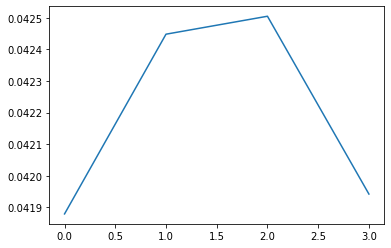

In [13]:
plt.plot(np.array(df2["mean"]))

In [14]:
horizon = 10
adaptation_steps = 1
dataset = "HR"
experiment_type = "VRAE"
df2 = df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps)].groupby(["Vrae weight", "Adaptation steps", "Horizon", "Task size"])["Value"].agg(["mean"])

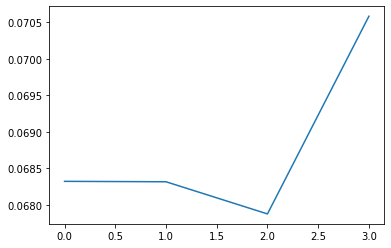

In [15]:
plt.plot(np.array(df2["mean"]))

,,,,mean
Vrae weight,Adaptation steps,Horizon,Task size,
0.000,1,10,50,0.001897
0.001,1,10,50,0.001596
0.010,1,10,50,0.001843
0.100,1,10,50,0.002354


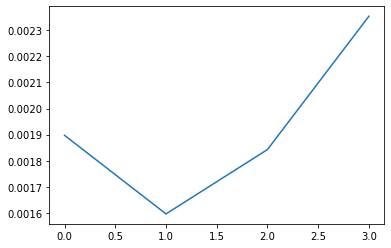

In [21]:
horizon = 10
adaptation_steps = 1
dataset = "BATTERY"
experiment_type = "VRAE"
df2 = df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps) & (df["Learning rate"]==0.0001)].groupby(["Vrae weight", "Adaptation steps", "Horizon", "Task size"])["Value"].agg(["mean"])
plt.plot(np.array(df2["mean"]))
df2

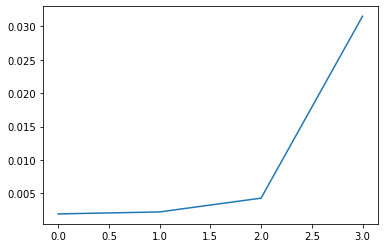

In [17]:
horizon = 10
adaptation_steps = 1
dataset = "BATTERY"
experiment_type = "NOISE"
df2 = df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps)].groupby(["Noise level", "Adaptation steps", "Horizon", "Task size"])["Value"].agg(["mean"])
plt.plot(np.array(df2["mean"]))

,,,,,,mean,std,count
Noise level,Vrae weight,Adaptation steps,Horizon,Task size,Learning rate,,,
0.000,0.0,1,1,50,0.01,0.040544,0.001002,8
0.001,0.0,1,1,50,0.01,0.041994,0.002278,8
0.010,0.0,1,1,50,0.01,0.042354,0.002999,8
0.100,0.0,1,1,50,0.01,0.042915,0.001372,8


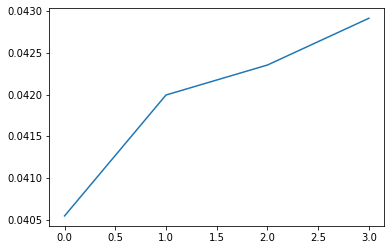

In [60]:
horizon = 1
adaptation_steps = 1
dataset = ""
experiment_type = "VRAE"
learning_rate = 0.0001
#print(df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps) & (df["Learning rate"]==learning_rate) & (df["Training"]=="MMAML")])
df2 = df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps) & (df["Learning rate"]==learning_rate) & (df["Training"]=="MMAML")].groupby(["Noise level", "Vrae weight","Adaptation steps", "Horizon", "Task size", "Learning rate"])["Value"].agg(["mean", "std", "count"])
plt.plot(np.array(df2["mean"]))
df2

In [42]:
df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps) & (df["Learning rate"]==0.01)]

,Experiment_id,Model,Dataset,Learning rate,Noise level,Task size,Evaluation loss,Vrae weight,Training,Meta-learning rate,ML-Horizon,Trial,Adaptation steps,Horizon,Value,Val error,Final_epoch
0,NOISE1_ABLATION,LSTM,HR,0.01,0.000,50,MAE Test,0,MMAML,0.0005,1,0,1,10,0.068269,0.063612,1763
4,NOISE1_ABLATION,LSTM,HR,0.01,0.000,50,MAE Test,0,MMAML,0.0005,1,1,1,10,0.070401,0.065956,1779
8,NOISE1_ABLATION,LSTM,HR,0.01,0.000,50,MAE Test,0,MMAML,0.0005,1,2,1,10,0.067295,0.063702,1407
0,NOISE1_ABLATION_1,LSTM,HR,0.01,0.000,50,MAE Test,0,MMAML,0.0005,1,0,1,10,0.075800,0.064909,1141
4,NOISE1_ABLATION_1,LSTM,HR,0.01,0.000,50,MAE Test,0,MMAML,0.0005,1,1,1,10,0.068595,0.064569,1350
8,NOISE1_ABLATION_1,LSTM,HR,0.01,0.000,50,MAE Test,0,MMAML,0.0005,1,2,1,10,0.066971,0.063890,1713
12,NOISE1_ABLATION_1,LSTM,HR,0.01,0.000,50,MAE Test,0,MMAML,0.0005,1,3,1,10,0.065778,0.063445,2171
16,NOISE1_ABLATION_1,LSTM,HR,0.01,0.000,50,MAE Test,0,MMAML,0.0005,1,4,1,10,0.073630,0.065463,1438
0,NOISE1_ABLATION_2,LSTM,HR,0.01,0.000,50,MAE Test,-,MAML,0.0005,1,0,1,10,0.080665,0.066919,980
4,NOISE1_ABLATION_2,LSTM,HR,0.01,0.000,50,MAE Test,-,MAML,0.0005,1,1,1,10,0.072836,0.064236,1691


,,,,,mean,std,count
ML-Horizon,Noise level,Adaptation steps,Horizon,Task size,,,
1,0.0,1,10,50,0.041339,0.000878,8
2,0.0,1,10,50,0.041615,0.001363,5
5,0.0,1,10,50,0.042431,0.002005,5
10,0.0,1,10,50,0.041697,0.001529,5


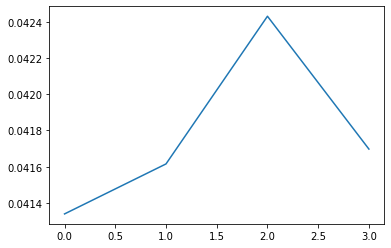

In [46]:
horizon = 10
adaptation_steps = 1
dataset = "POLLUTION"
experiment_type = "HORIZON"
df2 = df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps)].groupby(["ML-Horizon" ,"Noise level", "Adaptation steps", "Horizon", "Task size"])["Value"].agg(["mean", "std", "count"])
plt.plot(np.array(df2["mean"]))
df2

In [19]:
df

,Experiment_id,Model,Dataset,Learning rate,Noise level,Task size,Evaluation loss,Vrae weight,Training,Meta-learning rate,ML-Horizon,Trial,Adaptation steps,Horizon,Value,Val error,Final_epoch
0,HORIZON10_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,2,0,1,10,0.001551,0.001736,2514
1,HORIZON10_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,2,0,0,10,0.001874,0.001997,2514
2,HORIZON10_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,2,0,1,1,0.001980,NaN,2514
3,HORIZON10_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,2,0,0,1,0.002354,NaN,2514
4,HORIZON10_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,2,1,1,10,0.001456,0.001741,2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,VRAE9_ABLATION_2,LSTM,BATTERY,0.0010,0.0,50,MAE Test,0.1,MMAML,0.00005,1,3,0,1,0.006964,NaN,883
16,VRAE9_ABLATION_2,LSTM,BATTERY,0.0010,0.0,50,MAE Test,0.1,MMAML,0.00005,1,4,1,10,0.003313,0.003566,1680
17,VRAE9_ABLATION_2,LSTM,BATTERY,0.0010,0.0,50,MAE Test,0.1,MMAML,0.00005,1,4,0,10,0.005427,0.005534,1680
18,VRAE9_ABLATION_2,LSTM,BATTERY,0.0010,0.0,50,MAE Test,0.1,MMAML,0.00005,1,4,1,1,0.002955,NaN,1680


In [20]:
horizon = 10
adaptation_steps = 1
dataset = "POLLUTION"
experiment_type = "VRAE"
df2 = df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps)].groupby(["Vrae weight", "Adaptation steps", "Horizon", "Task size"], as_index = False)["Value"].agg(["mean"])
df2 = df2.reset_index()


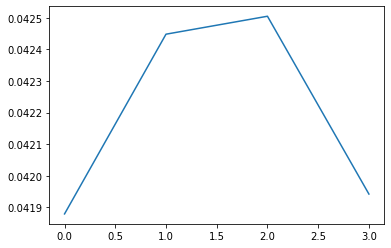

In [21]:
plt.plot(np.array(df2["mean"]))

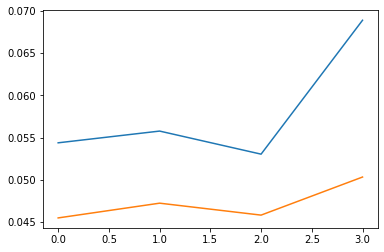

In [189]:
horizon = 1
adaptation_steps = 0
dataset = "HR"
experiment_type = "NOISE"
var = "Noise level"
df2 = df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps)].groupby([var, "Adaptation steps", "Horizon", "Task size"], as_index = False)["Value"].agg(["mean"])
df2 = df2.reset_index()
plt.plot(np.array(df2["mean"]))

horizon = 1
adaptation_steps = 1
dataset = "HR"
experiment_type = "NOISE"
var = "Noise level"
df2 = df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps)].groupby([var, "Adaptation steps", "Horizon", "Task size"], as_index = False)["Value"].agg(["mean"])
df2 = df2.reset_index()
plt.plot(np.array(df2["mean"]))

In [190]:
df2

,Noise level,Adaptation steps,Horizon,Task size,mean
0,0.000,1,1,50,0.045485
1,0.001,1,1,50,0.047231
2,0.010,1,1,50,0.045817
3,0.100,1,1,50,0.050327


In [168]:
df2

,Vrae weight,Adaptation steps,Horizon,Task size,mean
0,0.0,1,10,50,0.070329


In [173]:
df2 = df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps)].groupby(["Vrae weight", "Adaptation steps", "Horizon", "Task size", "Noise level"], as_index = False)["Value"].agg(["mean"])


In [174]:
df

,Experiment_id,Model,Dataset,Learning rate,Noise level,Task size,Evaluation loss,Vrae weight,Training,Meta-learning rate,ML-Horizon,Trial,Adaptation steps,Horizon,Value,Val error,Final_epoch
0,HORIZON1_ABLATION,LSTM,HR,0.01,0.0,50,MAE Test,0.0,MMAML,0.0005,1,0,1,10,0.083331,0.073623,157
1,HORIZON1_ABLATION,LSTM,HR,0.01,0.0,50,MAE Test,0.0,MMAML,0.0005,1,0,0,10,0.089711,0.085415,157
2,HORIZON1_ABLATION,LSTM,HR,0.01,0.0,50,MAE Test,0.0,MMAML,0.0005,1,0,1,1,0.062888,NaN,157
3,HORIZON1_ABLATION,LSTM,HR,0.01,0.0,50,MAE Test,0.0,MMAML,0.0005,1,0,0,1,0.081984,NaN,157
4,HORIZON1_ABLATION,LSTM,HR,0.01,0.0,50,MAE Test,0.0,MMAML,0.0005,1,1,1,10,0.086934,0.088309,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,VRAE9_ABLATION,LSTM,BATTERY,0.01,0.0,50,MAE Test,0.1,MMAML,0.0005,1,1,0,1,0.038311,NaN,1226
8,VRAE9_ABLATION,LSTM,BATTERY,0.01,0.0,50,MAE Test,0.1,MMAML,0.0005,1,2,1,10,0.001980,0.002263,1933
9,VRAE9_ABLATION,LSTM,BATTERY,0.01,0.0,50,MAE Test,0.1,MMAML,0.0005,1,2,0,10,0.044178,0.043989,1933
10,VRAE9_ABLATION,LSTM,BATTERY,0.01,0.0,50,MAE Test,0.1,MMAML,0.0005,1,2,1,1,0.002507,NaN,1933


In [175]:
df2

mean
Vrae weight Adaptation steps Horizon Task size Noise level          
0.0         1                10      50        0.000        0.068655
                                               0.001        0.070001
                                               0.010        0.069123
                                               0.100        0.073537

In [13]:
df2 = df[df["Experiment_id"].str.contains("ABLATION_2")].groupby(["Vrae weight", "Adaptation steps", "Horizon", "Task size", "Noise level"], as_index = False)["Value"].agg(["mean"])
df2

mean
Vrae weight Adaptation steps Horizon Task size Noise level          
0.000       0                1       50        0.0          0.005823
                             10      50        0.0          0.005036
            1                1       50        0.0          0.002338
                             10      50        0.0          0.002124
0.001       0                1       50        0.0          0.005995
                             10      50        0.0          0.005155
            1                1       50        0.0          0.002367
                             10      50        0.0          0.002121
0.010       0                1       50        0.0          0.005927
                             10      50        0.0          0.005077
            1                1       50        0.0          0.002522
                             10      50        0.0          0.002220
0.100       0                1       50        0.0          0.006331
                             10      50        0.0          0.005076
            1                1       50        0.0          0.002531
                             10      50        0.0          0.002417

,ML-Horizon,Adaptation steps,Horizon,Task size,mean,std,count
0,1,1,1,50,0.002313,0.000258,5
1,2,1,1,50,0.002081,0.000168,5


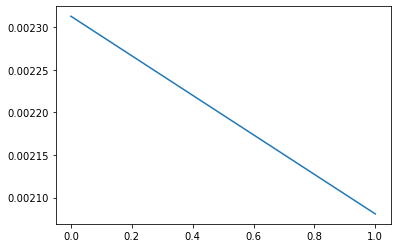

In [52]:

horizon = 1
adaptation_steps = 1
dataset = "BATTERY"
experiment_type = "HORIZON"
var = "ML-Horizon"
learning_rate = 0.0001
df2 = df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps) & (df["Learning rate"]==learning_rate)].groupby([var, "Adaptation steps", "Horizon", "Task size"], as_index = False)["Value"].agg(["mean", "std", "count"])
df2 = df2.reset_index()
plt.plot(np.array(df2["mean"]))
df2

In [151]:

df[(df['Experiment_id'].str.contains(experiment_type) ) & (df["Dataset"] == dataset) & (df["Horizon"] == horizon) & (df["Adaptation steps"]== adaptation_steps) &( df["Learning rate"]== 0.0001)]

,Experiment_id,Model,Dataset,Learning rate,Noise level,Task size,Evaluation loss,Vrae weight,Training,Meta-learning rate,ML-Horizon,Trial,Adaptation steps,Horizon,Value,Val error,Final_epoch
0,HORIZON9_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,1,0,1,10,0.001426,0.001703,2693
4,HORIZON9_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,1,1,1,10,0.001833,0.002103,3362
8,HORIZON9_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,1,2,1,10,0.002103,0.002346,1848
12,HORIZON9_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,1,3,1,10,0.002019,0.002371,1997
16,HORIZON9_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0,MMAML,0.00005,1,4,1,10,0.001986,0.002400,1944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,VRAE9_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0.1,MMAML,0.00005,1,0,1,10,0.001471,0.001768,2278
4,VRAE9_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0.1,MMAML,0.00005,1,1,1,10,0.002042,0.002326,2908
8,VRAE9_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0.1,MMAML,0.00005,1,2,1,10,0.003338,0.003681,1091
12,VRAE9_ABLATION_1,LSTM,BATTERY,0.0001,0.0,50,MAE Test,0.1,MMAML,0.00005,1,3,1,10,0.002562,0.002877,2528


In [143]:
df2

Vrae weight Adaptation steps Horizon Task size     Value                  \
                                                      mean       std count   
0           0                1      10        50  0.068947  0.003794    69   
1       0.001                1      10        50  0.068316  0.003330     8   
2        0.01                1      10        50  0.067876  0.002891     8   
3         0.1                1      10        50  0.070586  0.003670     8   
4           -                1      10        50  0.076767  0.005417    20   

  Val error                  
       mean       std count  
0  0.064133  0.003249    69  
1  0.065402  0.001922     8  
2  0.063763  0.001225     8  
3  0.065473  0.001719     8  
4  0.069228  0.003984    20